# Data and APIs

Most of the data is on servers on the internet.

The internet works mostly through the [HTTP](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol), where you send data to an address on the internet, and it responds with the appropriate data for a response.

This is what your web browser mostly does under the hood, but the `requests` library is your best friend when making calls to the internet by hand programmatically.

[Here is](https://github.com/public-apis/public-apis#science--math) a great list of API's to get free data. Here is one API where we can get a random image:

In [1]:
import requests

#  API that returns random image
r = requests.get("https://picsum.photos/200")
r

<Response [200]>

The `response` object has a value to say if it succeded or failed in the HTTP request you made.

The response depends on the type of request, which depends on the website/API you are calling. The most popular request types are `GET`, `POST`, and `PUT` HTTP calls.

- The `GET` request sends a URL and receives data back

- The `POST` request sends a URL and data and receives data

- The `PUT` request sends data and updates what's happening on the server.

To create datasets the `GET` and `POST` will be most commonly used.

Here, 200 denotes success. We can see in the response content that an image was sent back as raw bytes:

In [2]:
r.content[:200]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00\xdeExif\x00\x00II*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x008c\x00\x00\xe8\x03\x00\x008c\x00\x00\xe8\x03\x00\x00\x07\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x86\x92\x07\x00\x16\x00\x00\x00\xc0\x00\x00\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00'

Which we can show with the `PIL` library:

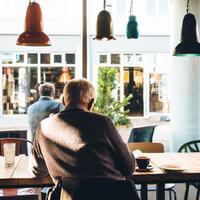

In [3]:
from PIL import Image
from io import BytesIO

Image.open(BytesIO(r.content))

# JSON is the infrastructure of the world

You can in theory get anything in response to a `GET` request, but by far the most popular data format is our old friend `JSON`.

Here is an API for (ugh) Chuck Norris jokes:

In [4]:
r = requests.get("https://api.chucknorris.io/jokes/random")
print(r)
r.content

<Response [200]>


b'{"categories":[],"created_at":"2020-01-05 13:42:21.179347","icon_url":"https://assets.chucknorris.host/img/avatar/chuck-norris.png","id":"miejrZaRSdyxdtiCQK_T2Q","updated_at":"2020-01-05 13:42:21.179347","url":"https://api.chucknorris.io/jokes/miejrZaRSdyxdtiCQK_T2Q","value":"Chuck Norris shits in urinals."}'

Note the JSON can be used normally in python. We can see the `value` field is the actual joke.

In [5]:
import json

json.loads(r.content)

{'categories': [],
 'created_at': '2020-01-05 13:42:21.179347',
 'icon_url': 'https://assets.chucknorris.host/img/avatar/chuck-norris.png',
 'id': 'miejrZaRSdyxdtiCQK_T2Q',
 'updated_at': '2020-01-05 13:42:21.179347',
 'url': 'https://api.chucknorris.io/jokes/miejrZaRSdyxdtiCQK_T2Q',
 'value': 'Chuck Norris shits in urinals.'}

Here is a dataset API from UBoulder Colorage in earth sciences which responds with a larger JSON object:

In [12]:
r = requests.get('https://data.colorado.gov/resource/tv8u-hswn.json?&county=Boulder')
print(r)
r.content[:500]

<Response [200]>


b'[{"id":"33307","county":"Boulder","fipscode":"13","year":"1990","age":"0","malepopulation":"1597","femalepopulation":"1630","totalpopulation":"3227","datatype":"Estimate"}\n,{"id":"33308","county":"Boulder","fipscode":"13","year":"1990","age":"1","malepopulation":"1583","femalepopulation":"1581","totalpopulation":"3164","datatype":"Estimate"}\n,{"id":"33309","county":"Boulder","fipscode":"13","year":"1990","age":"2","malepopulation":"1593","femalepopulation":"1564","totalpopulation":"3157","dataty'

Pandas has methods like `pd.DataFrame.from_dict` and `pd.read_json` to try to parse the data into a DataFrame:

In [19]:
pd.DataFrame.from_dict(json.loads(r.content))

,id,county,fipscode,year,age,malepopulation,femalepopulation,totalpopulation,datatype
0,33307,Boulder,13,1990,0,1597,1630,3227,Estimate
1,33308,Boulder,13,1990,1,1583,1581,3164,Estimate
2,33309,Boulder,13,1990,2,1593,1564,3157,Estimate
3,33310,Boulder,13,1990,3,1631,1530,3161,Estimate
4,33311,Boulder,13,1990,4,1696,1594,3290,Estimate
...,...,...,...,...,...,...,...,...,...
995,34302,Boulder,13,2000,85,141,301,442,Estimate
996,34303,Boulder,13,2000,86,115,294,409,Estimate
997,34304,Boulder,13,2000,87,113,238,351,Estimate
998,34305,Boulder,13,2000,88,96,211,307,Estimate


Note that sometimes the data needs some work to be formatted before you can make it into a dataframe!

You'll often have to manually "fix" the dictionary JSON objects to make it tabular.